# Matplotlib -- A Mostly Formal Introduction

Matplotlib is Python's most used library for scientific visualization. However, there are many ways to use it, and its syntax can be a little misleading. A good starting point is in https://matplotlib.org/faq/usage_faq.html. This post complements the aforemention link by being a little more hands-on, without becoming an example-based tutorial. This tutorial is aimed at people who use Matplotlib, but is not sure of what they are doing. I am doing this as a reference to myself, to be honest.

## Figures and Axes

First thing you have to remember is that there are two ways of using Matplotlib, the **global** way and the **local, object oriented** one. The latter is more readable and flexible, while the former is quicker to write. 

With the global approach, you are always working with one **implicit** figure. Every time you order the library to draw something, it will do it in this elusive entity. In the local approach, you will create **Figure** objects and explicitely say you want to draw things in it. I will be focusing on the figure approach.

Figures are the top-level container for drawings. They have a specific size (in inches). Inside them lie **Axes** (not axis!) objects. An Axes object is a region on a Figure, and it is in it that the actual plotting of graphs happens. You can have many Axes in a Figure, even if they overlap. Think of them as zones, really. 


## The Plot Function

An empty Figure is not even white. It is not even transparent. If you want a small rectangle around it, you have to create an Axes, and then draw it. If you want to plot a one variable function, you would have to plot every one of its points, and then connect neighbors by small lines. Luckily, there is the $plot$ function, which is perfect for most of our functional needs. You give it your x (inputs) and your f(x) (outputs). It creates a figure with an Axes in it. It  this Axes, it draws everything we need: x ticks, y ticks, a rectangle around it and, of course, the points connected by lines we know and love.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

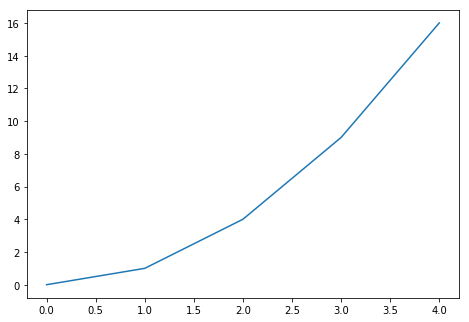

In [2]:
X = [0,1,2,3,4]
Fx = [x**2 for x in X]   

fig = plt.figure()
ax = fig.add_axes([0., 0., 1., 1., ]) # define a rectangle
ax.plot(X,Fx) # plots happen inside Axes objects

plt.show(fig)

Even though we can dispose the Axes how we want inside the figure,
we usually do the same configuration over and over, creating equal-sized, 
equally-spaced rectangular Axes. So there is a shorthand to create a Figure with this kind of display: the **subplots** function. This one creates a Figure with a set of Axes disposed in a rectangular fashion inside. You dictate the fashion: The first argument dictates how many lines the grid will have, the second the number of columns. The subplot will give you a figure and a matrix of Axes. You access each Axes by its row and column, and fill it with plots, for instance. Let's create a 2x2 subplot, and fill it with different functions:

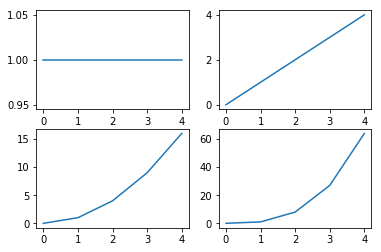

In [20]:
fig,axes = plt.subplots(2,2)

F0 = [x**0 for x in X]
F1 = [x**1 for x in X]
F2 = [x**2 for x in X]
F3 = [x**3 for x in X]


axes[0,0].plot(X,F0)
axes[0,1].plot(X,F1)
axes[1,0].plot(X,F2)
axes[1,1].plot(X,F3)

plt.show(fig)


Another useful way to create grids of plots is by creating a figure and then adding subplots to it with the $add\_subplot$ function. With add subplots, you specify the grid structure you are imagining in your mind, and he will return you an Axes with these dimensions. This function takes 3 parameters: **the number of rows** you are imagining, **the number of columns**, and the number of the section of the grid you want to access. So, for example, if you want a 2x2 grid and you want the bottom left square, you should do a $add\_subplot(2,2,3)$ (it counts by row, then by column). 

This way is better suited for making irregular grid. For example, suppose we want a graph to fill half the Figure and other two to fill the bottom. We would do:

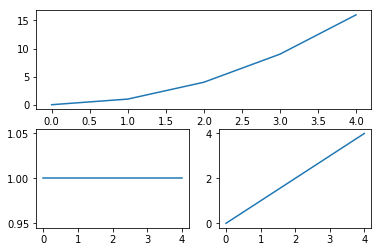

In [38]:
fig = plt.figure()

ax12 = fig.add_subplot(2,1,1) # This one fills 
                            # the top half of the picture

ax3 = fig.add_subplot(2,2,3) # These ones fill half of the 
ax4 = fig.add_subplot(2,2,4) # space left each.

ax12.plot(X,Fx)
ax3.plot(X,F0)
ax4.plot(X,F1)

plt.show(fig)

## Tips and extras

1. There are many ways of customizing plots, by adding titles, changing objects and lines, changing the axis...Think that this is all done in the graph, that is the Axes, level. Think of adding a title as Adding a mini-Axes of text to your Axes.
2. If something is badly aligned, if ticks are overlapping, think that subplot Axes overlap, specially when it comes to titles and ticks. using $plt.tight\_layout()$ usually solves it.
3. There are different types of plot, such as scatter plots, heatmaps, polar plots and others. You can easily mix together many kinds of plots in a figure. Again, think in terms of Figures and Axes. Choose an Axes, draw however many plots you want, even one on top of the other, and go to the next one. 